# Building a simple search engine
## Part 1: Dataset statistics

Below we will be building a very simple search engine in Python. This is representative of a data science project in that we collect and process data for our purposes. The idea of this exercise is to learn to translate requirements written in English into Python code. Only the concepts and functions from previous sessions and the notebook before this one are needed for these exercises. If there is any questions, please ask questions during sessions or on Slack!

In this exercise we will introduce the dataset and have a look into it to have a rough idea of what it contains.

## Data collection and preprocessing

A search engine needs data that can be searched. Data is typically downloaded from the Internet and preprocessed in a list format. For this step, I have collected and processed a list of computer science papers from the [Computing Research Repository](https://arxiv.org/corr) of [arXiv](https://arxiv.org), an open access database of scientific publications. Within the repository we took papers that are in at least one of the following categories: [Artificial Intelligence](https://arxiv.org/list/cs.AI/recent), [Computer Vision and Pattern Recognition](https://arxiv.org/list/cs.CV/recent), and [Machine Learning](https://arxiv.org/list/cs.LG/recent).

### Loading the dataset

The dataset has 2 files, both stored in the [pickle](https://docs.python.org/3.8/library/pickle.html) format, and then compressed with the [LZMA](https://en.wikipedia.org/wiki/Lempel%E2%80%93Ziv%E2%80%93Markov_chain_algorithm) algorithm. The `arxiv_cs_summaries.pickle.xz` file is a list of tuples consisting of the title (`str`), list of authors (`list` of `str`), year of publishing (`int`) and a link to the paper (`str`), and the `arxiv_cs_descriptions.pickle.xz` file contains a list of article descriptions as a string.

For this exercise we are only using the summaries file. To use the dataset, we will decompress the file, load it into Python, and then convert the tuples into named tuples.

In [3]:
import pickle, lzma
from collections import namedtuple

summaries_file = 'data/arxiv_cs_summaries.pickle.xz'
summaries = pickle.load(lzma.LZMAFile(summaries_file, 'rb'))

paper = namedtuple("paper", ["title", "authors", "year", "link"])
papers = [paper(*p) for p in summaries]

## A quick look into the data

Now that we know the data is structured as a list of tuples, we can try some things to warm up, for example how many items are there and what do they look like.

In [2]:
print(f"There are {len(papers)} papers in this dataset")

There are 82033 papers in this dataset


In [3]:
print(papers[0].title)

Intelligent location of simultaneously active acoustic emission sources:  Part I


## Plotting the data

We can have a better look at some of the data by plotting them. For that we import `matplotlib` and set it up:

In [15]:
import matplotlib.pyplot as plt

# Show plots instead of plot objects on the notebook
%matplotlib inline
# Set plots' sizes
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12.5
plt.rcParams['ytick.labelsize'] = 12.5

## Papers per year

We can often have a good look by looking into the relationships between different variables. Let's begin with the number of papers published every year.

In [10]:
from collections import Counter

years = [p.year for p in papers]

papers_per_year = sorted(Counter(years).items())

print("Number of papers published on arXiv per year in the past decade:")
for year, count in papers_per_year[-10:]:
    print(f"{year}: {count}")

Number of papers published on arXiv per year in the past decade:
2010: 946
2011: 1396
2012: 2578
2013: 3413
2014: 3385
2015: 4586
2016: 7266
2017: 10809
2018: 18301
2019: 26616


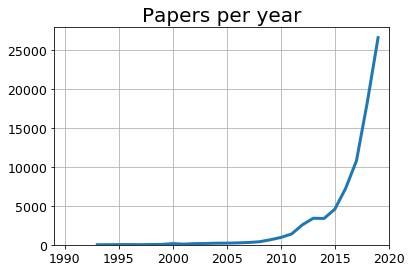

In [25]:
x, y = zip(*papers_per_year)

plt.plot(x, y, linewidth=3)
plt.title("Papers per year")
plt.grid(which='major')
plt.xlim(1989, 2020)
plt.ylim(bottom=0)
plt.show()

## Papers per author

Now that we have the papers per year plotted, let's plot the number of papers written per author.

**Exercise:** Print the top 10 authors with the most paper written. Note that there can be more than one author for a paper.

*Hint:* List comprehension, `Counter` and `sorted()` are used here.

In [31]:
authors = [author for p in papers for author in p.authors]
papers_per_author = Counter(authors)

top_10_authors = sorted(papers_per_author.items(), key=lambda i:i[1], reverse=True)[:10]

print("Top 10 authors with the most papers:")
for name, count in top_10_authors:
    print(f"{name}: {count}")

Top 10 authors with the most papers:
Bengio, Yoshua: 281
Shen, Chunhua: 211
Levine, Sergey: 182
Tao, Dacheng: 181
Van Gool, Luc: 153
Abbeel, Pieter: 139
Aickelin, Uwe: 136
Zhang, Lei: 130
Jordan, Michael I.: 130
Darrell, Trevor: 128


**Exercise:** Create a [histogram](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) of the number of papers written for the authors. Use the log scale for the y-axis.

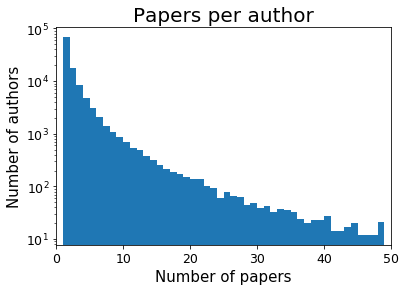

In [8]:
plt.hist(x=list(papers_per_author.values()), bins=range(50), log=True)
plt.title("Papers per author")
plt.xlabel("Number of papers")
plt.ylabel("Number of authors")
plt.xlim(0, 50)
plt.show()

## Most frequent words

**Exercise**: First, create a list of words from the paper titles by splitting the title by space and then convert each word into lower-case then, count the most frequent words in the titles (using `Counter`) and save it in a variable named `word_counts`.

In [9]:
words = [word.lower() for paper in papers for word in paper.title.split(' ')]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
46902


**Exercise**: Create a function `top(n)` that takes an input `n` and returns a list of top `n` most frequent words in the titles.

In [10]:
def top(n):
    return sorted(word_counts.items(), key=lambda i:i[1], reverse=True)[:n]

**Exercise:** Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent. (You can make use of `top()` created above.)

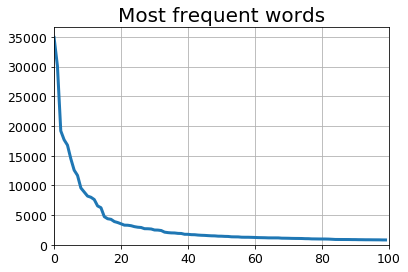

In [11]:
x = range(0,100)
# The y-axis is the frequencies of the first 100 words
y = [v for (k, v) in top(100)]

plt.plot(x, y, linewidth=3)
plt.title("Most frequent words")
plt.grid(which='major')
plt.xlim(0, 100)
plt.ylim(bottom=0)
plt.show()

**Exercise:** Print out the top 50 most often occurring words in the paper's titles.

In [12]:
print(top(50))

[('', 34890), ('for', 30096), ('of', 19173), ('and', 17673), ('learning', 16773), ('a', 14485), ('in', 12562), ('with', 11677), ('the', 9572), ('deep', 8881), ('using', 8198), ('networks', 8001), ('neural', 7618), ('on', 6539), ('to', 6244), ('image', 4733), ('network', 4384), ('from', 4287), ('detection', 3910), ('data', 3746), ('based', 3531), ('classification', 3307), ('an', 3293), ('via', 3213), ('convolutional', 3055), ('recognition', 2959), ('models', 2913), ('model', 2711), ('by', 2702), ('segmentation', 2662), ('analysis', 2490), ('approach', 2476), ('adversarial', 2402), ('machine', 2132), ('images', 2051), ('estimation', 2004), ('reinforcement', 1991), ('optimization', 1922), ('prediction', 1905), ('object', 1769), ('visual', 1765), ('efficient', 1708), ('3d', 1696), ('feature', 1638), ('algorithm', 1602), ('bayesian', 1583), ('generative', 1544), ('robust', 1513), ('graph', 1502), ('video', 1453)]


**Question:** Keeping in mind that we are dealing with a biased (preselected) dataset about machine learning/artificial intelligence papers, what do you notice when looking at the top 10 most frequent words?

**Answer:** They are filler words that don't mean a lot.